In [1]:
from batch import BatchResult
batch_params = {
    "N": [100],
    "province": ["Ontario"],
    "random_seed": range(0,7),
    "n_segregation_steps": [40],
    "global_util_thresh": [0.1],
    "price_weight_mode": [0.3],
    "ts_step_length": ["w"],
    "start_year": 2020,
    "refurbishment_rate": 0.03,
    "hp_subsidy": 0.1,
    "fossil_ban_year": 2030
}

res = BatchResult.from_parameters(batch_params, max_steps=100)


results_dir=WindowsPath('c:/src/canadopt/abetam/results/subsidy_tracking/77ac65b140570e3e44cb6658b42eed66') does not exist. Running model.


100%|██████████| 7/7 [00:17<00:00,  2.50s/it]


# Calculation of subsidies

Total amount of subsidies $T^S$

$$
T^S = \sum_y N^p_y * s * P_y 
$$
with 
* Purchase price at year $y$: $P_y$
* subsidy fraction $s$
* amount of purchases in a year $N^p_y$

where $P_y = C_{y,i} * \dot{D}$ 

In [2]:
(res.tech_shares_df.set_index(["RunId","province","year"]).sum(axis=1)*100 - 100.0 > 1e-6).sum()



0

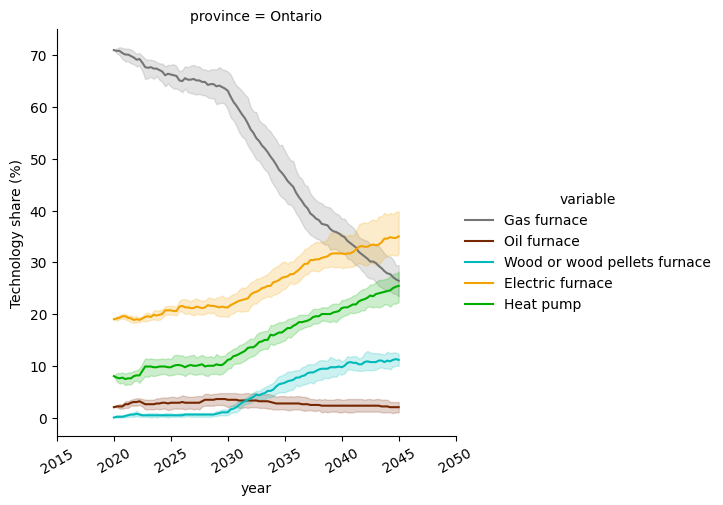

In [3]:
res.tech_shares_fig()

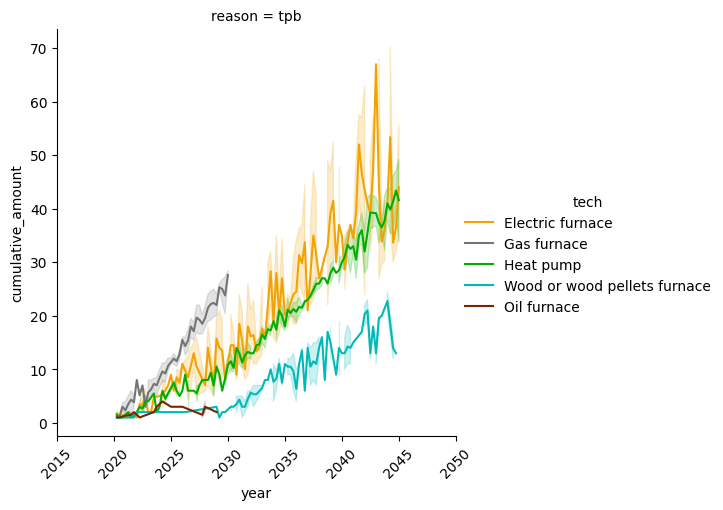

In [4]:
res.adoption_details_fig()

<Axes: xlabel='year'>

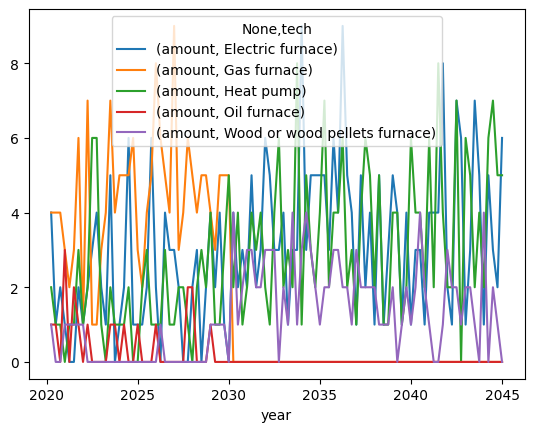

In [5]:
# res.adoption_details_df.groupby(["year","tech"])["amount"].sum().reset_index().pivot(columns="tech", index="year").fillna(0).plot()

In [10]:
if not res.path.exists():
    res.save()

<Axes: xlabel='year', ylabel='Cumulative subsidy amount (CAD)'>

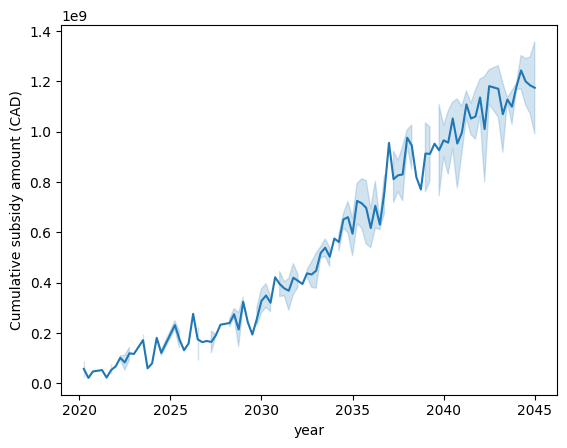

In [11]:
res.subsidies_fig()

# Calculation of emissions


In [12]:
res.emissions().head()

,Fuels.ELECTRICITY,Fuels.HEATING_OIL,Fuels.NATURAL_GAS,Fuels.WOOD_OR_WOOD_PELLETS
2020,0.476514,1.198197,18.308606,0.000000
2021,0.478126,1.299499,17.806418,0.017594
2022,0.479738,1.400801,17.304230,0.035188
2023,0.481350,1.502103,16.802041,0.052782
2024,0.482962,1.603406,16.299853,0.070377


In [13]:
import plotly.express as px

fig = px.line(res.emissions().cumsum(), template="plotly")
fig.update_layout(yaxis_title="CO2 Emissions (Mt)", width=500)